In [47]:
from Bio import SeqIO
#import pylab
# import required Biophython functions 
from Bio import Entrez
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# programmatic access to reference gene sequences in the NCBI database

In [48]:
# enter your gene references here:

# this is an example comparing the the human and mouse Fmr1 gene
# muattions of this gene can cause severe learning disability/autism
# it is one of the genes researched here at Edinburgh

gene_id1 = 'NG_029020.1' # dolphin
gene_id2 = 'NM_001290424.1' # mouse

# Change these identifiers, and compare related or entirely unrelated genes


In [49]:
Entrez.email = 'A.N.Other@example.com'

# read the first sequence
handle = Entrez.efetch(db="nucleotide", id=gene_id1, rettype="gb", retmode="text")
record1 = SeqIO.read(handle, "genbank")
handle.close()

# read the second sequence
handle = Entrez.efetch(db="nucleotide", id=gene_id2, rettype="gb", retmode="text")
record2 = SeqIO.read(handle, "genbank")
handle.close()


# show the sequence record information
print(record1.description)
print(record2.description)

Homo sapiens high mobility group AT-hook 1 (HMGA1), RefSeqGene on chromosome 6
Mus musculus fragile X mental retardation syndrome 1 (Fmr1), transcript variant 2, mRNA


In [50]:
# obtain the sequence objects
gene1 = record1.seq
gene2 = record2.seq

print(gene1[:100])
print(gene2[:100])

ACCATGCCTGGCTACGTTTTTTGTAATTTTAGTAGAGATGGGTTTCACCATGTGGTCAGGCTGGTCTCAAACTCCTGACTTCAAATGATCCTCCCGCCTC
GTTTGACTGTTTACAGGAGGCGCAGCGGAGCCCTTGGCCTCAGTCAGTCAGGCGCTGGGGAGCGTTTCGGTTTCACTTCCGGTGAGGGGCCGCGCCTGAG


In [51]:
# this is the whole transcript
# location of the coding sequence is here
for f in record1.features:
    if f.type=='CDS':
        print('Coding sequence at:',f.location)
        cds_loc = f.location
for f in record2.features:
    if f.type=='CDS':
        print('Coding sequence at:',f.location)
        cds_loc = f.location


('Coding sequence at:', CompoundLocation([FeatureLocation(ExactPosition(8981), ExactPosition(9116), strand=1), FeatureLocation(ExactPosition(10912), ExactPosition(10996), strand=1), FeatureLocation(ExactPosition(11668), ExactPosition(11719), strand=1), FeatureLocation(ExactPosition(13031), ExactPosition(13085), strand=1)], 'join'))
('Coding sequence at:', CompoundLocation([FeatureLocation(ExactPosition(15667), ExactPosition(15686), strand=-1), FeatureLocation(ExactPosition(15244), ExactPosition(15350), strand=-1), FeatureLocation(ExactPosition(14714), ExactPosition(15069), strand=-1)], 'join'))
('Coding sequence at:', CompoundLocation([FeatureLocation(ExactPosition(15667), ExactPosition(15686), strand=-1), FeatureLocation(ExactPosition(15244), ExactPosition(15350), strand=-1), FeatureLocation(ExactPosition(14714), ExactPosition(15069), strand=-1)], 'join'))
('Coding sequence at:', CompoundLocation([FeatureLocation(ExactPosition(15667), ExactPosition(15686), strand=-1), FeatureLocation(

In [52]:
# perform comarison

# these are the start locations 
# for the comparisons:
start1 = 0
start2 = 0 

# number of nucleotides to compare
nn = 600

# window size for comparison
ws = 3

s1 = str(gene1[start1:start1+nn])
s2 = str(gene2[start2:start2+nn])

# compare each with each:
c = [[(s1[i:i+ws] == s2[j:j+ws]) 
      for j in range(len(s1)-ws)] for i in range(len(s2)-ws)]

# (also compare a gene to itself)

print('Total number of matches:'+str(np.sum(c)))

Total number of matches:5574


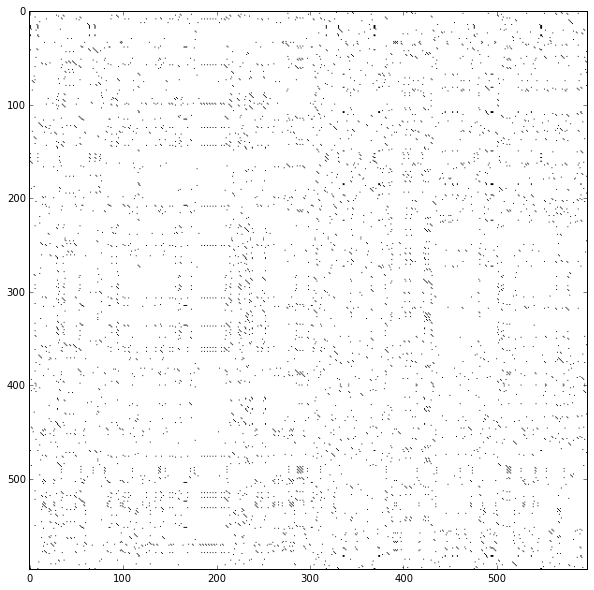

In [53]:
# a graphics view of the comparison
# each black dot indicates a matching tuple

plt.figure(figsize=(10,10))
pylab.imshow(c,cmap='gray_r',interpolation=None)
pylab.show()